<a href="https://colab.research.google.com/github/ashishsaini01/fastai_thesis_work/blob/thesis/oe_fastai_tiny_image_as_ood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
path_to_custom_dataset = '/content/drive/MyDrive/tiny_data_thesis/all_images_tiny'
# path_to_mnist_dataset = untar_data(URLs.MNIST)

In [14]:
# Load MNIST data
path_to_mnist = untar_data(URLs.MNIST)

In [15]:
items_custom = get_image_files(path_to_custom_dataset)

In [16]:
items_custom

(#58339) [Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57398.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57399.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57400.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57401.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57402.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57403.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57404.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57405.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57406.jpg'),Path('/content/drive/MyDrive/tiny_data_thesis/all_images_tiny/image_57407.jpg')...]

In [9]:
items_mnist = get_image_files(path_to_mnist)
items_mnist

(#70000) [Path('/root/.fastai/data/mnist_png/testing/1/9096.png'),Path('/root/.fastai/data/mnist_png/testing/1/1075.png'),Path('/root/.fastai/data/mnist_png/testing/1/3430.png'),Path('/root/.fastai/data/mnist_png/testing/1/2258.png'),Path('/root/.fastai/data/mnist_png/testing/1/1305.png'),Path('/root/.fastai/data/mnist_png/testing/1/3747.png'),Path('/root/.fastai/data/mnist_png/testing/1/7722.png'),Path('/root/.fastai/data/mnist_png/testing/1/9994.png'),Path('/root/.fastai/data/mnist_png/testing/1/2175.png'),Path('/root/.fastai/data/mnist_png/testing/1/4847.png')...]

In [19]:
def resized_image(fn:Path, sz=28):
  "Opens an image from `fn` and resizes it to `sz`"
  x = Image.open(fn).convert('RGB').resize((sz,sz))
  return tensor(array(x)).permute(2,0,1).float()/255.


In [20]:
img1 = resized_image(items_mnist[0], 28)
img2 = resized_image(items_custom[0], 28)


In [21]:
class TitledImage(Tuple):
  def show(self, ctx=None, **kwargs): show_titled_image(self, ctx=ctx, **kwargs)


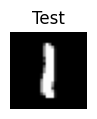

In [23]:
TitledImage((img1, 'Test')).show()

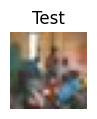

In [24]:
TitledImage((img2, 'Test')).show()

In [31]:
# map the labels for mnist data
mnist_label = items_mnist.map(parent_label)

In [32]:
mnist_label

(#70000) ['1','1','1','1','1','1','1','1','1','1'...]

In [45]:
# custom class
class CustomDataClass():
  """
    A transform to generate custom input data (Image_in, Image_out, Label_in)
  """
  def __init__(self, items_mnist, items_custom, mnist_label):
    self.items_mnist, self.items_custom, self.mnist_label = items_mnist, items_custom, mnist_label

  def return_tuple(self, i):
    return (self.items_mnist[i], self.items_custom[i], self.mnist_label[i])

In [106]:
# both the items should have same amount of images, to avoid 'IndexError'
idxs = np.random.permutation(range(len(items_mnist)))
idxs_custom = np.random.permutation(range(len(items_custom)))
cut = int(0.8 * len(items_mnist))
items_mnist_train = items_mnist[idxs[:cut]]
items_custom_train = items_custom[idxs_custom[:cut]]
mnist_label_train = mnist_label[idxs[:cut]]

In [107]:
pair = CustomDataClass(items_mnist_train, items_custom_train, mnist_label_train)

In [108]:
# open_and_resize = Transform(resized_image)

In [109]:
pipe = Pipeline([pair.return_tuple, resized_image])

In [110]:
image_in, image_out, label_in = pipe(0)

In [111]:
image_in.shape, image_out.shape, label_in

(torch.Size([3, 28, 28]), torch.Size([3, 28, 28]), '9')

In [114]:
# To run anything into a Dataloader, we want it to first be a TfmdList
tls = TfmdLists(range_of(items_mnist_train), pipe)

In [115]:
# make custom dataloaders
dls = tls.dataloaders(bs = 10)

In [116]:
batch = dls.one_batch()

In [117]:
a,b,c = batch[0][0], batch[1][0], batch[2][0]

In [118]:
a.shape, b.shape, c

(torch.Size([3, 28, 28]), torch.Size([3, 28, 28]), '4')

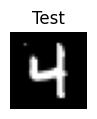

In [119]:
TitledImage((a, 'Test')).show()

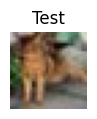

In [120]:
TitledImage((b, 'Test')).show()